<a href="https://colab.research.google.com/github/Dhanush-adk/intro_to_dl/blob/main/Assignment_1/Assignment_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)
np.random.seed(123)

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
url = 'https://raw.githubusercontent.com/Dhanush-adk/intro_to_dl/main/Assignment_1/house-train.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [104]:
df_dtype = pd.DataFrame(df.dtypes,columns=['dtype'])
print(df_dtype.value_counts())
print(df_dtype)

dtype  
object     38
int64      35
float64     3
dtype: int64
                 dtype
Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
...                ...
MoSold           int64
YrSold           int64
SaleType        object
SaleCondition   object
SalePrice        int64

[76 rows x 1 columns]


In [105]:
usefull_cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF'
                , 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces'
                ,'LotFrontage','WoodDeckSF','OpenPorchSF'
                ,'ExterQual','Neighborhood','MSZoning'
                ,'LotShape','LandContour','Condition1','HouseStyle','MasVnrType','SaleCondition', 'SalePrice']
df_featured = df[usefull_cols].copy()

In [106]:
df_featured['GarageArea'] = df_featured['GarageArea'].fillna(df_featured['GarageArea'].mean())
df_featured['TotalBsmtSF'] = df_featured['TotalBsmtSF'].fillna(df_featured['TotalBsmtSF'].mean())

In [107]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1201 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  MSZoning       1460 non-null   object 
 14  LotShape       1460 non-null   object 
 15  LandContour    1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  MasVnrTy

In [108]:
df_featured['LotFrontage'] = df_featured['LotFrontage'].fillna(df_featured['LotFrontage'].mean())

In [109]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1460 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  MSZoning       1460 non-null   object 
 14  LotShape       1460 non-null   object 
 15  LandContour    1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  MasVnrTy

In [110]:
df_featured['MasVnrType'] = df_featured['MasVnrType'].fillna(df_featured['MasVnrType'].mode().iloc[0])

In [111]:
df_featured['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [112]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [113]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1460 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  MSZoning       1460 non-null   object 
 14  LotShape       1460 non-null   object 
 15  LandContour    1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  HouseStyle     1460 non-null   object 
 18  MasVnrTy

In [114]:
df_featured = df_featured.replace({True: 1, False: 0})

In [115]:
df_featured.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,...,ExterQual,Neighborhood,MSZoning,LotShape,LandContour,Condition1,HouseStyle,MasVnrType,SaleCondition,SalePrice
0,7,1710,548,856,2,2003,2003,0,65.0,0,...,Gd,CollgCr,RL,Reg,Lvl,Norm,2Story,BrkFace,Normal,208500
1,6,1262,460,1262,2,1976,1976,1,80.0,298,...,TA,Veenker,RL,Reg,Lvl,Feedr,1Story,None,Normal,181500
2,7,1786,608,920,2,2001,2002,1,68.0,0,...,Gd,CollgCr,RL,IR1,Lvl,Norm,2Story,BrkFace,Normal,223500
3,7,1717,642,756,1,1915,1970,1,60.0,0,...,TA,Crawfor,RL,IR1,Lvl,Norm,2Story,None,Abnorml,140000
4,8,2198,836,1145,2,2000,2000,1,84.0,192,...,Gd,NoRidge,RL,IR1,Lvl,Norm,2Story,BrkFace,Normal,250000


In [116]:
categorical_columns = df_featured.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['ExterQual',
 'Neighborhood',
 'MSZoning',
 'LotShape',
 'LandContour',
 'Condition1',
 'HouseStyle',
 'MasVnrType',
 'SaleCondition']

In [117]:
df_featured[categorical_columns] = df_featured[categorical_columns].apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'O' else x)
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageArea     1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   FullBath       1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   Fireplaces     1460 non-null   int64  
 8   LotFrontage    1460 non-null   float64
 9   WoodDeckSF     1460 non-null   int64  
 10  OpenPorchSF    1460 non-null   int64  
 11  ExterQual      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  MSZoning       1460 non-null   int64  
 14  LotShape       1460 non-null   int64  
 15  LandContour    1460 non-null   int64  
 16  Condition1     1460 non-null   int64  
 17  HouseStyle     1460 non-null   int64  
 18  MasVnrTy

In [118]:
df_featured.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Fireplaces,LotFrontage,WoodDeckSF,...,ExterQual,Neighborhood,MSZoning,LotShape,LandContour,Condition1,HouseStyle,MasVnrType,SaleCondition,SalePrice
0,7,1710,548,856,2,2003,2003,0,65.0,0,...,2,5,3,3,3,2,5,1,4,208500
1,6,1262,460,1262,2,1976,1976,1,80.0,298,...,3,24,3,3,3,1,2,2,4,181500
2,7,1786,608,920,2,2001,2002,1,68.0,0,...,2,5,3,0,3,2,5,1,4,223500
3,7,1717,642,756,1,1915,1970,1,60.0,0,...,3,6,3,0,3,2,5,2,0,140000
4,8,2198,836,1145,2,2000,2000,1,84.0,192,...,2,15,3,0,3,2,5,1,4,250000


In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()

In [137]:
df_featured_scaled = pd.DataFrame(scaler_x.fit_transform(df_featured), columns=df_featured.columns)

In [138]:
X = df_featured_scaled.drop(['SalePrice'], axis=1)
y = df_featured_scaled['SalePrice']

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.fc1 = nn.Linear(20, 100)  # 6 input features
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)  # Output layer with 2 units for width and height

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Model, loss function, and optimizer
# Initialize the network
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [147]:

x_train = torch.tensor(X_train.values, dtype=torch.float)
x_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test = torch.tensor(y_test.values, dtype=torch.float)


In [148]:
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [149]:
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [160]:
train_loss_list = []
val_loss_list = []
num_epochs = 30
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear existing gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model parameters
        train_loss += loss.item() * inputs.size(0)  # Accumulate the loss

    # Calculate average training loss
    train_loss /= len(train_loader.dataset)
    train_loss_list.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_total = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            val_loss += loss.item() * inputs.size(0)  # Accumulate the loss
            val_total += ((outputs - targets) ** 2).sum().item()  # Accumulate squared errors

    # Calculate average validation loss (MSE) and RMSE
    val_loss /= len(test_loader.dataset)
    val_loss_list.append(val_loss)
    rmse = np.sqrt(val_total / len(test_loader.dataset))

    # Print training and validation results
    print(f'Epoch[{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation RMSE: {rmse:.4f}')


Epoch[1/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6932
Epoch[2/30], Train Loss: 0.0119, Validation Loss: 0.0152, Validation RMSE: 0.6921
Epoch[3/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6946
Epoch[4/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6953
Epoch[5/30], Train Loss: 0.0120, Validation Loss: 0.0153, Validation RMSE: 0.6976
Epoch[6/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6917
Epoch[7/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6956
Epoch[8/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6766
Epoch[9/30], Train Loss: 0.0120, Validation Loss: 0.0151, Validation RMSE: 0.6927
Epoch[10/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6965
Epoch[11/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6947
Epoch[12/30], Train Loss: 0.0120, Validation Loss: 0.0152, Validation RMSE: 0.6845
Epoch[13/30],

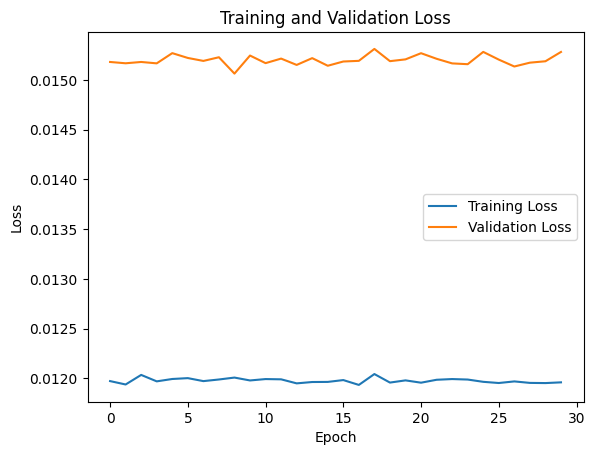

Final Validation RMSE: 0.6917


In [161]:
# Plotting training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print final RMSE
print(f'Final Validation RMSE: {rmse:.4f}')